<a href="https://www.kaggle.com/code/faiqueali/nyse-stock-analysis-assessing-normality?scriptVersionId=161545482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot, zscore

warnings.simplefilter('ignore')

sns.set_theme(style="whitegrid")

# Constant

In [2]:
DATASET_PATH = '/kaggle/input/stock-exchange-data/indexData.csv'
NEW_YORK_STOCK_EXCHANGE_CODE = 'NYA'

# Code

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head(5)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
stocks_data = df[df['Index'] == NEW_YORK_STOCK_EXCHANGE_CODE]
stocks_data.size

111584

## NYA- Opening Price Distribution Analysis

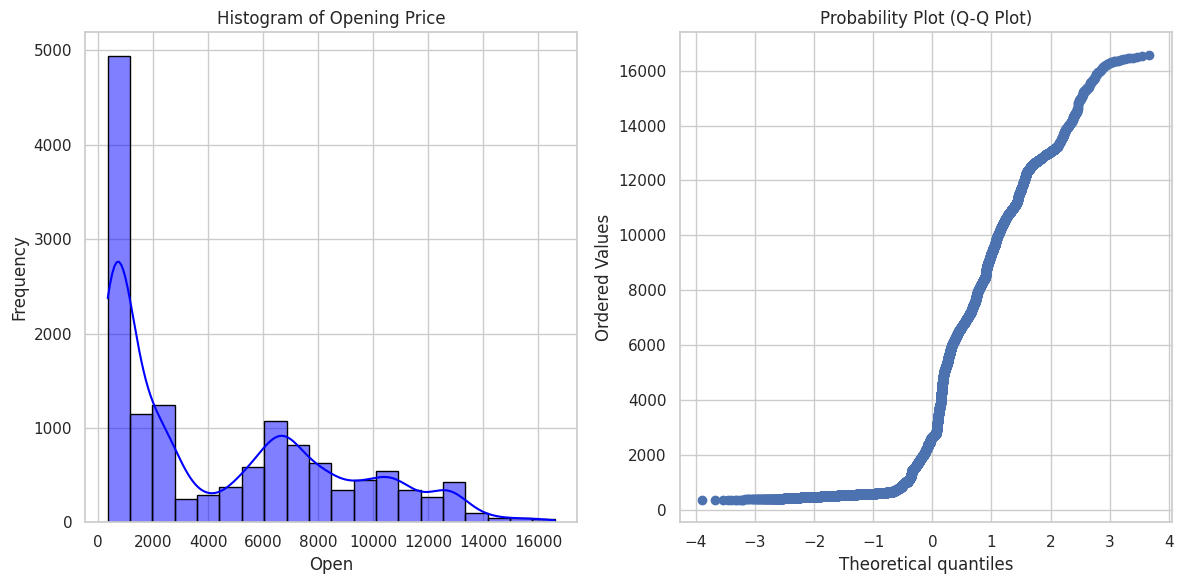

Opening Price is normally distributed (fail to reject H0) as p=1.0 is greater then alpha=0.05


In [5]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(stocks_data['Open'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Opening Price')
plt.xlabel('Open')
plt.ylabel('Frequency')

# Plot probability plot (quantile-quantile plot)
plt.subplot(1, 2, 2)
probplot(stocks_data['Open'], dist='norm', plot=plt)
plt.title('Probability Plot (Q-Q Plot)')

# Show the plots
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test
stat, p_value = shapiro(stocks_data['Open'])

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value > alpha:
    print(f'Opening Price is normally distributed (fail to reject H0) as p={p_value} is greater then alpha={alpha}')
else:
    print(f'Opening Price is not normally distributed (reject H0) as p={p_value} is lesser then alpha={alpha}')

## NYA- Closing Price Distribution Analysis

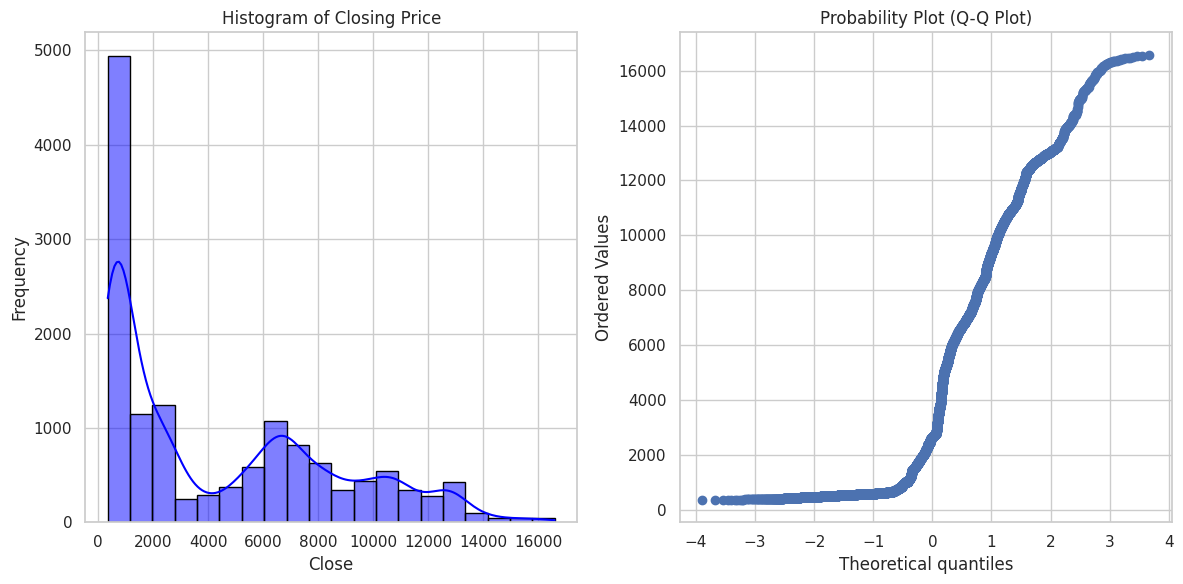

Closing Price is normally distributed (fail to reject H0) as p=1.0 is greater then alpha=0.05


In [6]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(stocks_data['Close'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Closing Price')
plt.xlabel('Close')
plt.ylabel('Frequency')

# Plot probability plot (quantile-quantile plot)
plt.subplot(1, 2, 2)
probplot(stocks_data['Close'], dist='norm', plot=plt)
plt.title('Probability Plot (Q-Q Plot)')

# Show the plots
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test
stat, p_value = shapiro(stocks_data['Close'])

# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value > alpha:
    print(f'Closing Price is normally distributed (fail to reject H0) as p={p_value} is greater then alpha={alpha}')
else:
    print(f'Opening Price is not normally distributed (reject H0) as p={p_value} is lesser then alpha={alpha}')

# Using standard z-score

In [7]:
# Function to check normality using z-score and Shapiro-Wilk test
def check_normality(column):
    z_scores = np.abs(zscore(column))
    shapiro_test = shapiro(column)
    
    # Visualize the distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(column, kde=True, color='skyblue')
    plt.title(f'Distribution of {column.name} with Z-Scores')
    plt.xlabel(column.name)
    plt.ylabel('Frequency')
    plt.show()

    # Print z-scores and Shapiro-Wilk test results
    print(f"Z-Scores for {column.name}:\n{z_scores}")
    print(f"Shapiro-Wilk Test for {column.name}:")
    print(f"  Statistic: {shapiro_test.statistic}")
    print(f"  P-value: {shapiro_test.pvalue}")

    # Compare p-value with alpha
    alpha = 0.05
    if shapiro_test.pvalue > alpha:
        print(f"\nThe null hypothesis (data is normally distributed) is accepted for {column.name}")
    else:
        print(f"\nThe null hypothesis (data is normally distributed) is rejected for {column.name}")


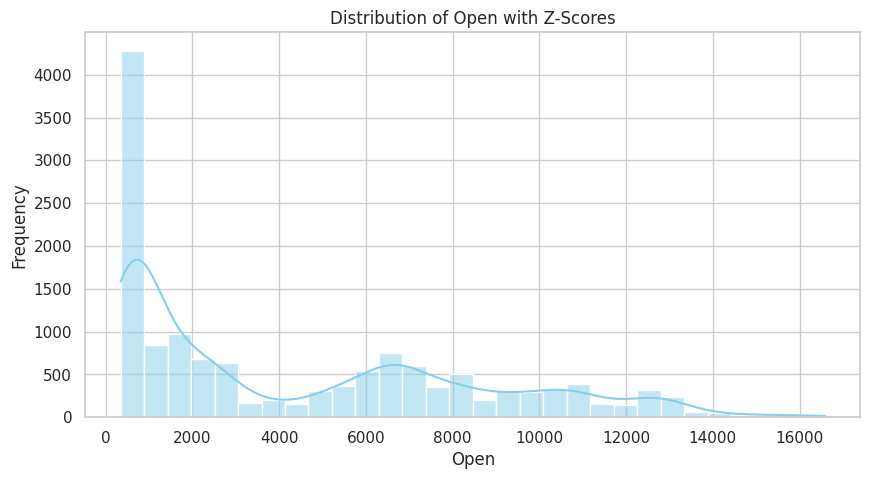

Z-Scores for Open:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13943   NaN
13944   NaN
13945   NaN
13946   NaN
13947   NaN
Name: Open, Length: 13948, dtype: float64
Shapiro-Wilk Test for Open:
  Statistic: nan
  P-value: 1.0

The null hypothesis (data is normally distributed) is accepted for Open


In [8]:
check_normality(stocks_data['Open'])

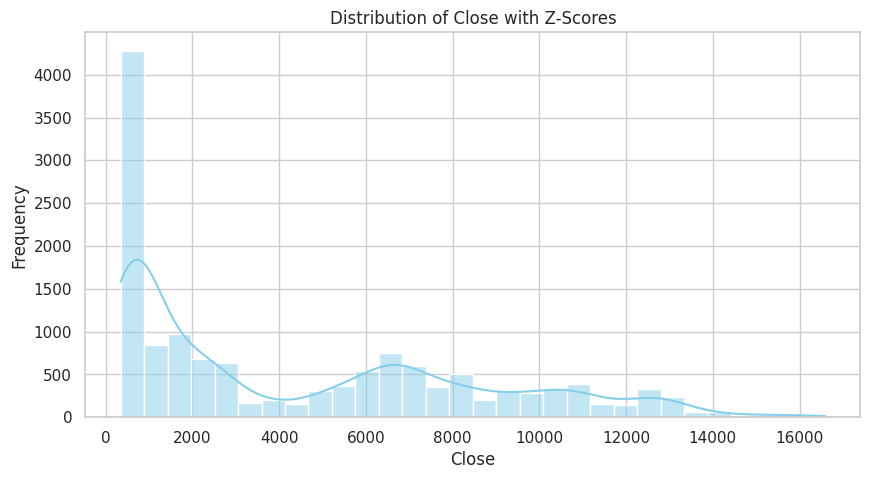

Z-Scores for Close:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13943   NaN
13944   NaN
13945   NaN
13946   NaN
13947   NaN
Name: Close, Length: 13948, dtype: float64
Shapiro-Wilk Test for Close:
  Statistic: nan
  P-value: 1.0

The null hypothesis (data is normally distributed) is accepted for Close


In [9]:
check_normality(stocks_data['Close'])